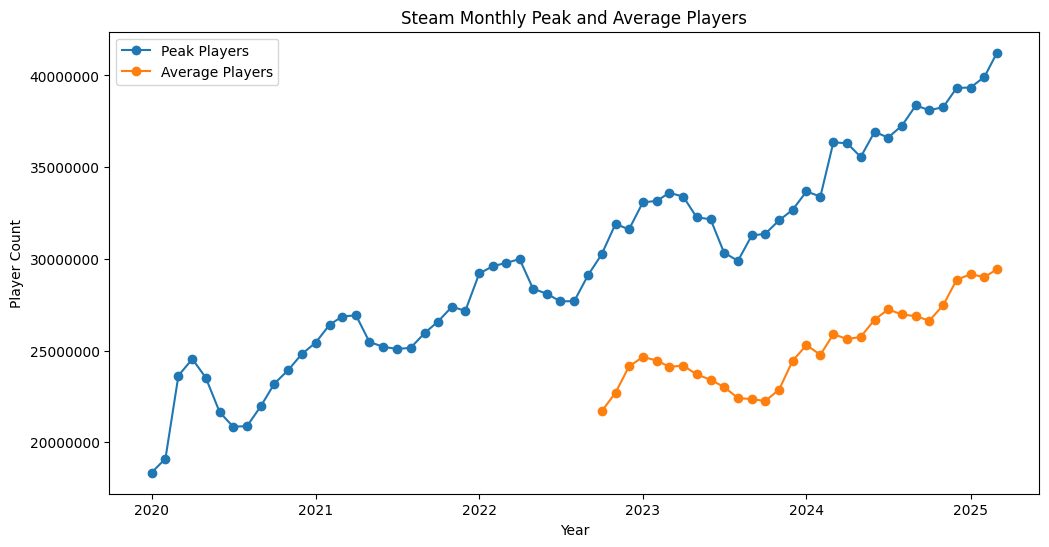

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df1=pd.read_csv('SteamPlayers.csv')

#removes the first row
df1=df1[df1['Month'] != 'Last 30 days']
#makes the months actual dates
df1['Month']=pd.to_datetime(df1['Month'], format='%b-%y')

#removes commas from numbers and turns them into float
df1['Peak']=df1['Peak'].str.replace(',','').astype(float)
df1['Average']=df1['Average'].str.replace(',', '').astype(float)
#Sorts date from newest to oldest
df1=df1.sort_values('Month')


plt.figure(figsize=(12, 6))
plt.title('Steam Monthly Peak and Average Players')
plt.ylabel('Player Count')
plt.xlabel('Year')
plt.plot(df1['Month'],df1['Peak'],marker='o',label='Peak Players')
plt.plot(df1['Month'],df1['Average'],marker='o',label='Average Players')
#makes y-axis labels real numbers
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()

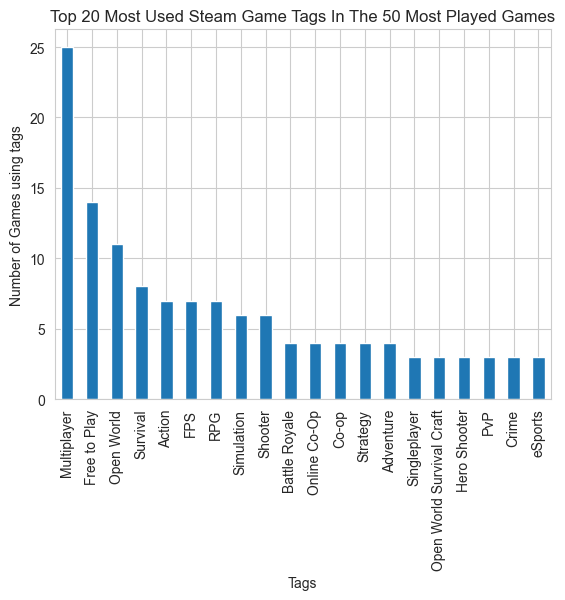

In [74]:

df2 = pd.read_csv('Top100 Steam games.csv')

all_tags = []
for i in range(5, 10):  #find columns with the tags
    for tag in df2.iloc[:,i].dropna():
        if tag.strip():
            all_tags.append(tag.strip())

#Count frequency and get top 20
tag_counts = pd.Series(all_tags).value_counts().head(20)

tag_counts.plot(kind='bar')
plt.title('Top 20 Most Used Steam Game Tags In The 50 Most Played Games')
plt.ylabel('Number of Games using tags')
plt.xlabel('Tags')
plt.show()

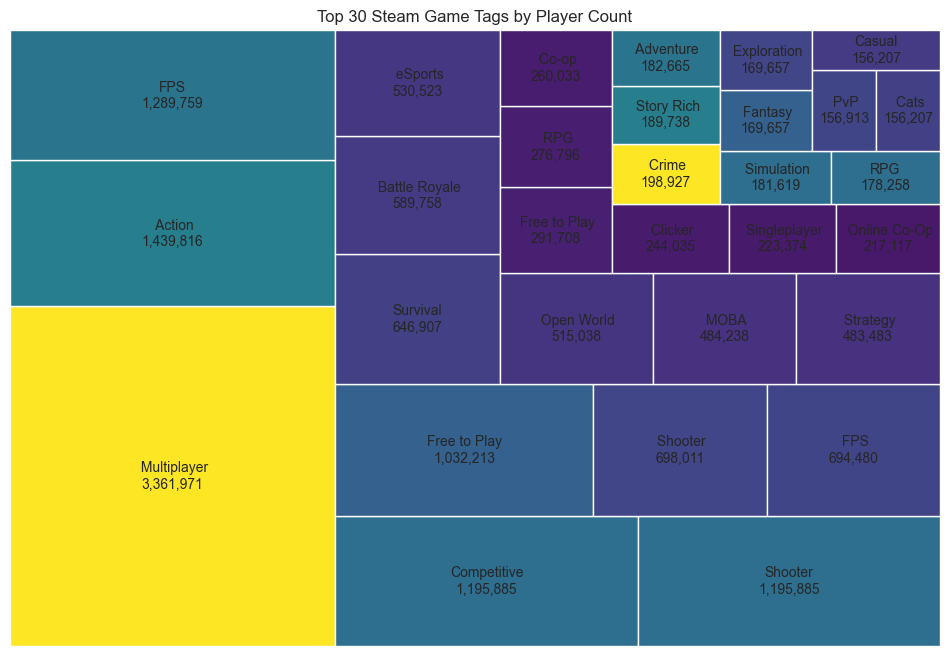

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify as squ


df2 = pd.read_csv('Top100 Steam games.csv')

tag_players = {}

#Goes through each game
for _, row in df2.iterrows():
    current_players=row['Current']
    
    #Finds the tags then adds up player count
    for i in range(5, 10):
        tag = row.iloc[i]
        if pd.notna(tag) and tag.strip():
            if tag in tag_players:
                tag_players[tag]+=current_players
            else:
                tag_players[tag]=current_players

#turns tag_df2 to a dataframe to make it easier to sort
tag_df2=pd.DataFrame({'Tag':list(tag_players.keys()), 'Players':list(tag_players.values())}).sort_values('Players', ascending=False)

#Get top 30 tags by player count
top_tags=tag_df2.head(30)


plt.figure(figsize=(12, 8))
#Creates a treemap and adds labels for each tag
squ.plot(sizes=top_tags['Players'], label=[f"{tag}\n{players:,}" for tag, players in zip(top_tags['Tag'], top_tags['Players'])],color=colors)
                     

plt.axis('off')
plt.title('Top 30 Steam Game Tags by Player Count')

plt.show()

